In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv('dataset/train_ctrUa4K.csv', index_col=None)
test = pd.read_csv('dataset/test_lAUu6dG.csv', index_col=None)
sample = pd.read_csv('dataset/sample_submission_49d68Cx.csv', index_col=None)

data = train.append(test)


In [6]:
'''
Hypothesis generation
    Salary: Applicants with high income should have more chances of loan approval.
    Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
    Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
    Loan term: Loan for less time period and less amount should have higher chances of approval.
    EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.
'''

'\nHypothesis generation\n    Salary: Applicants with high income should have more chances of loan approval.\n    Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.\n    Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.\n    Loan term: Loan for less time period and less amount should have higher chances of approval.\n    EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.\n'

In [7]:
#Train & Test & Sample Data Shape
train.shape, test.shape, sample.shape, data.shape

((614, 13), (367, 12), (367, 2), (981, 13))

In [8]:
#Train Column & Datatype
data.columns , data.dtypes
input_var = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area']
target_var = ['Loan_Status']

In [9]:
num_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Credit_History']

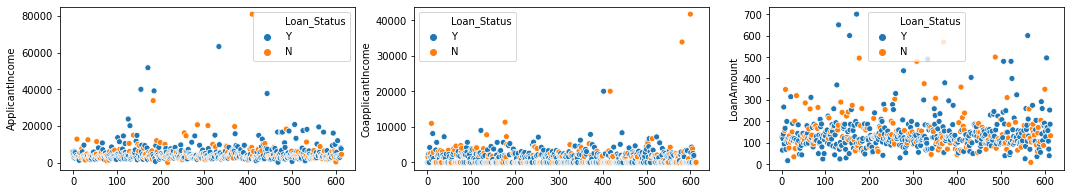

In [10]:
plt.figure(figsize=(18, 3))
plt.subplot(131)
sns.scatterplot(y=train.ApplicantIncome, x=train.index, hue=train.Loan_Status)
plt.subplot(132)
sns.scatterplot(y=train.CoapplicantIncome, x=train.index, hue=train.Loan_Status)
plt.subplot(133)
sns.scatterplot(y=train.LoanAmount, x=train.index, hue=train.Loan_Status)
plt.show()

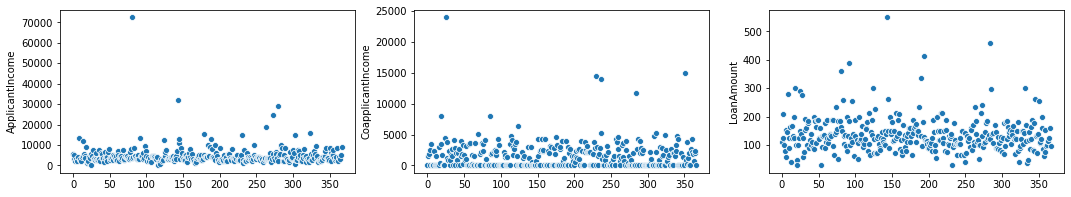

In [11]:
plt.figure(figsize=(18, 3))
plt.subplot(131)
sns.scatterplot(y=test.ApplicantIncome, x=test.index)
plt.subplot(132)
sns.scatterplot(y=test.CoapplicantIncome, x=test.index)
plt.subplot(133)
sns.scatterplot(y=test.LoanAmount, x=test.index)
plt.show()

/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


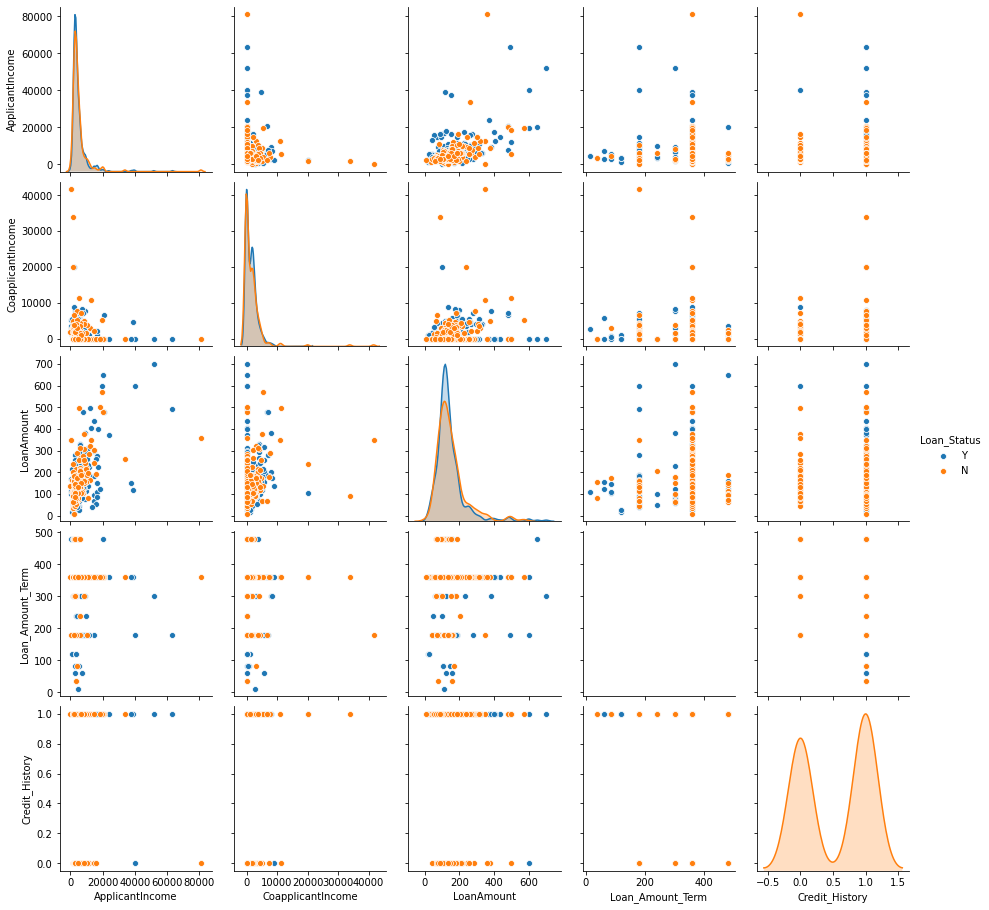

In [12]:
sns.pairplot(train, hue ='Loan_Status')

In [13]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

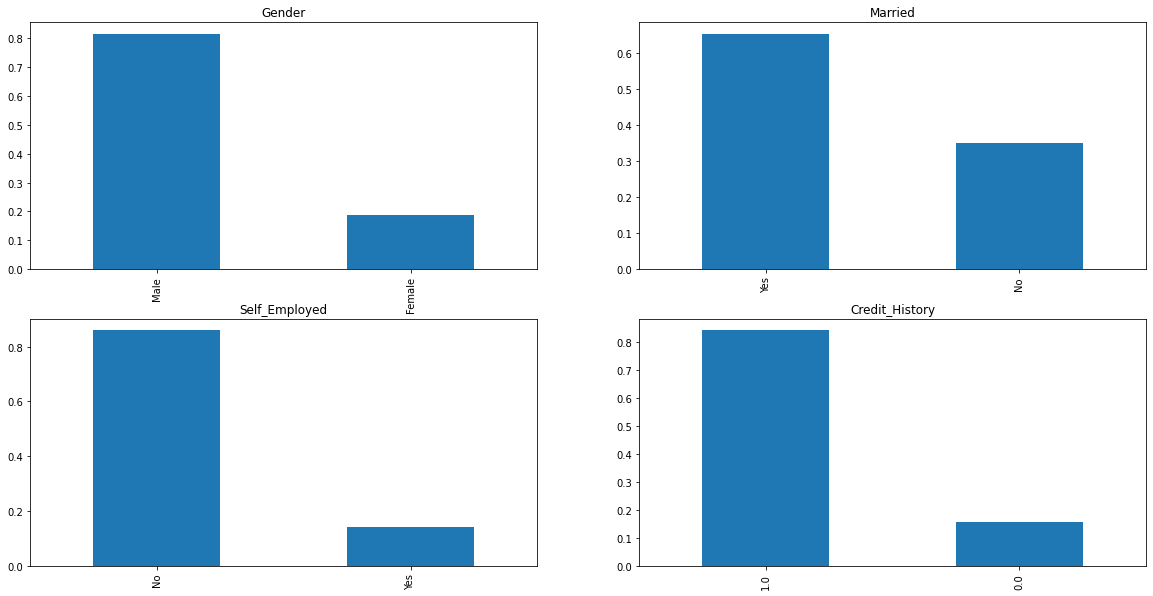

'It can be inferred from the above bar plots that:\n\n    80% applicants in the dataset are male.\n    Around 65% of the applicants in the dataset are married.\n    Around 15% applicants in the dataset are self employed.\n    Around 85% applicants have repaid their debts.'

In [15]:
#Independent Variable Categorical
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

'''It can be inferred from the above bar plots that:

    80% applicants in the dataset are male.
    Around 65% of the applicants in the dataset are married.
    Around 15% applicants in the dataset are self employed.
    Around 85% applicants have repaid their debts.'''

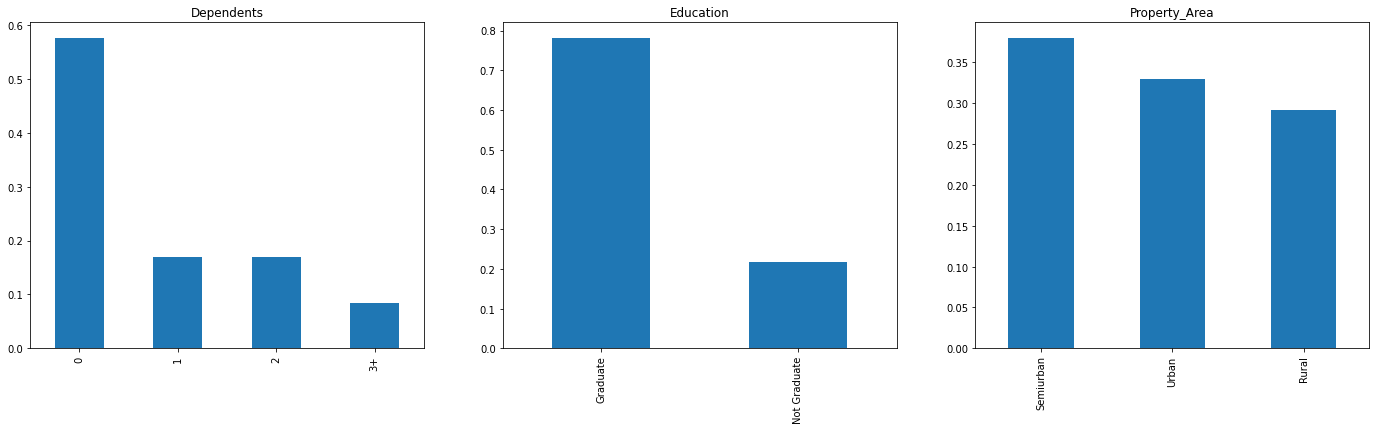

' Most of the applicants don’t have any dependents.\n    Around 80% of the applicants are Graduate.\n    Most of the applicants are from Semiurban area.'

In [16]:
#Independent Variable Ordinal
plt.figure(1) 
plt.subplot(131), train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132), train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133), train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()
''' Most of the applicants don’t have any dependents.
    Around 80% of the applicants are Graduate.
    Most of the applicants are from Semiurban area.'''

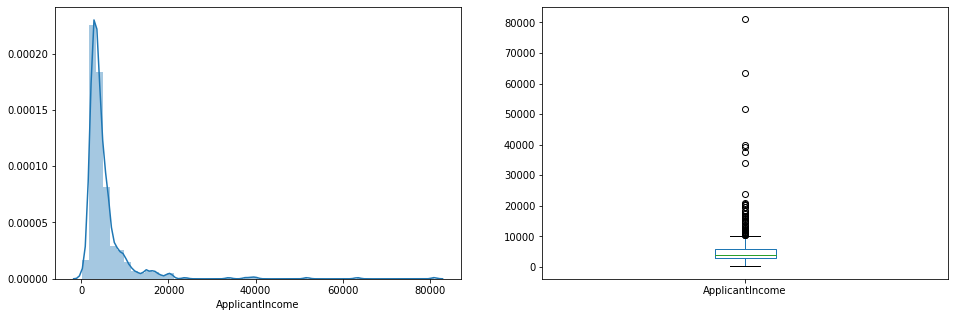

In [17]:
#Independent Variable(Numerical)
plt.figure(1) 
plt.subplot(121), sns.distplot(train['ApplicantIncome']); 
plt.subplot(122), train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

'We can see that there are a higher number of graduates with very high incomes, \nwhich are appearing to be the outliers.'

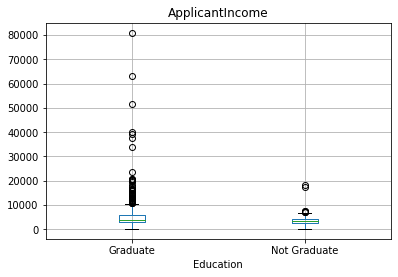

In [18]:
#Graduate Income
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("") 
'''We can see that there are a higher number of graduates with very high incomes, 
which are appearing to be the outliers.'''

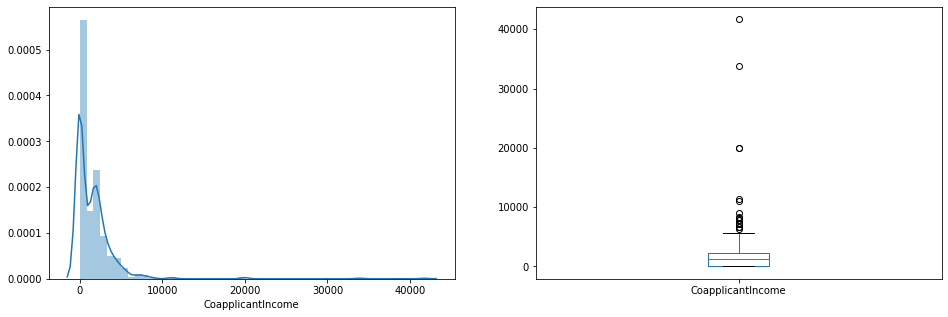

In [19]:
#UnderGradudate Income
plt.figure(1) 
plt.subplot(121), sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122), train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

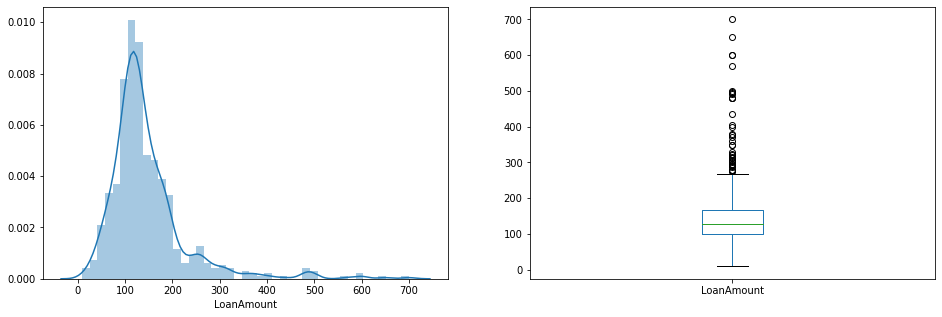

In [20]:
#Loan Amount Variable
plt.figure(1) 
plt.subplot(121), sns.distplot(train['LoanAmount'])
plt.subplot(122), train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

'Proportion of Loan sanction is almost same for Male and Female'

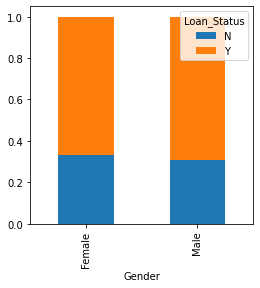

In [21]:
#Categorical Independent Variable and Target Variable
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
'''Proportion of Loan sanction is almost same for Male and Female'''

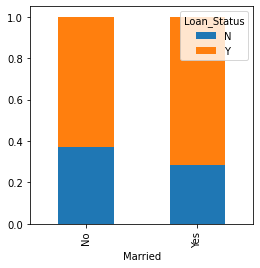

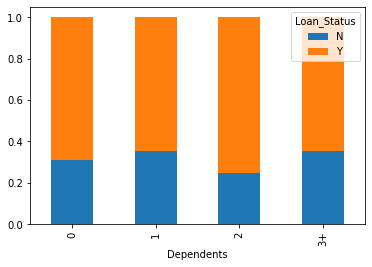

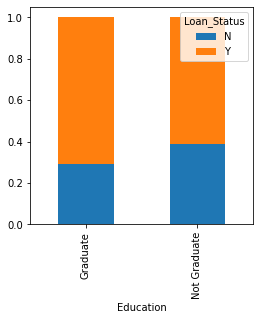

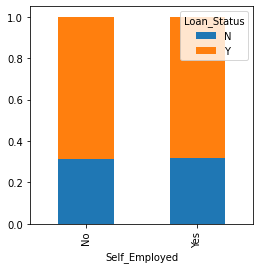

' Proportion of married applicants is higher for the approved loans.\n    Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.\n    There is nothing significant we can infer from Self_Employed vs Loan_Status plot.'

In [22]:
#Other Categorical Variable vs Target Variable
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)), plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True), plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)), plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)), plt.show()
''' Proportion of married applicants is higher for the approved loans.
    Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
    There is nothing significant we can infer from Self_Employed vs Loan_Status plot.'''

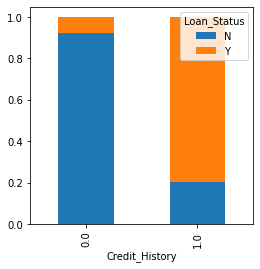

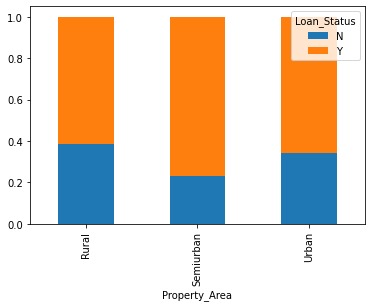

' It seems people with credit history as 1 are more likely to get their loans approved.\n    Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.'

In [23]:
#Remaining Categrical Variable and Loan Status
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)), plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True), plt.show()
''' It seems people with credit history as 1 are more likely to get their loans approved.
    Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.'''

<AxesSubplot:xlabel='Loan_Status'>

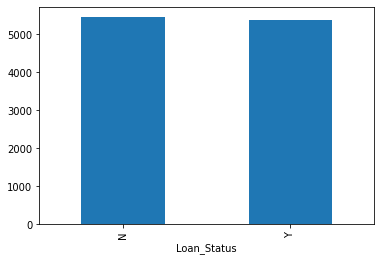

In [24]:
#Numerical Independent Variable and Target Variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

'It can be inferred that Applicant income does not affect the chances of loan approval \nwhich contradicts our hypothesis in which we assumed that if the applicant income is high \nthe chances of loan approval will also be high.'

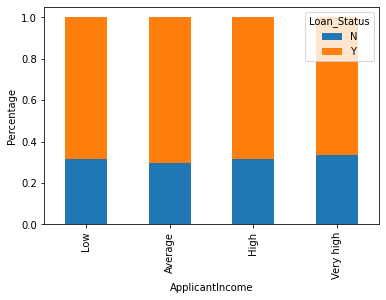

In [25]:
#Applicant Income Vs Target Variable
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')
'''It can be inferred that Applicant income does not affect the chances of loan approval 
which contradicts our hypothesis in which we assumed that if the applicant income is high 
the chances of loan approval will also be high.'''

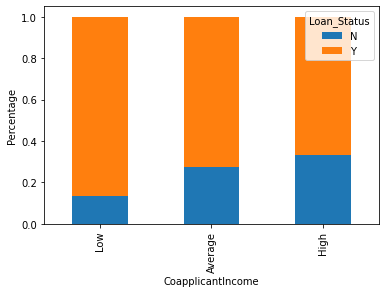

In [26]:
#Coapplicant Income Vs Target Variable
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

'We can see that Proportion of loans getting approved for applicants having low Total_Income is \nvery less as compared to that of applicants with Average, High and Very High Income.'

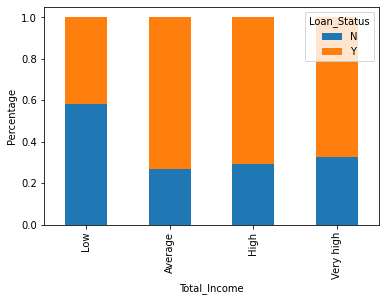

In [27]:
#Let us combine the Applicant Income and Coapplicant Income 
#and see the combined effect of Total Income on the Loan_Status.
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')
'''We can see that Proportion of loans getting approved for applicants having low Total_Income is 
very less as compared to that of applicants with Average, High and Very High Income.'''

'It can be seen that the proportion of approved loans is higher for Low and \nAverage Loan Amount as compared to that of High Loan Amount which supports our \nhypothesis in which we considered that the chances of loan approval will be high when the loan amount is less'

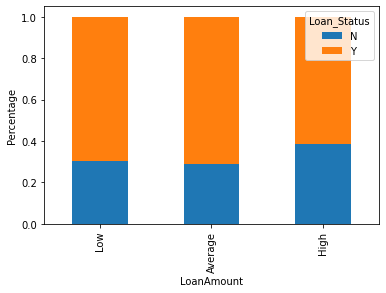

In [28]:
#Loan Amount Variable
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')
'''It can be seen that the proportion of approved loans is higher for Low and 
Average Loan Amount as compared to that of High Loan Amount which supports our 
hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less'''

In [29]:
#Drop the Bins created for EDA, Map target Variable to 0 & 1's
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

'We see that the most correlated variables are (ApplicantIncome - LoanAmount) and \n(Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.'

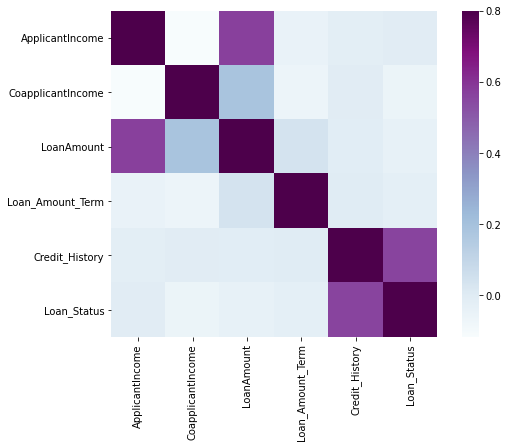

In [30]:
#Create a Corelation Matrix
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
'''We see that the most correlated variables are (ApplicantIncome - LoanAmount) and 
(Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.'''

In [31]:
#Missing Value Imputation
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
#Missing Values
#Gender, Married, Dependents, Credit_History and Self_Employed features
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [33]:
#Missing Values
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [34]:
#Same Approach for Missing Values in Test Data
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

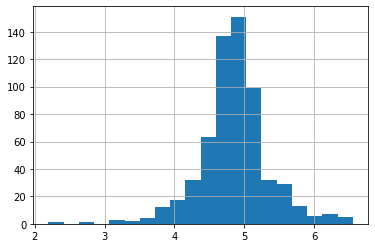

In [35]:
#Outlier Treatment in Loan Amount
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [36]:
#Model Building Part I

#Droping Loan ID from Train and test dataset
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [37]:
#Seperating Target Variable
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [38]:
#Encoding the categorical columns only
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [39]:
#Spliting Train Data into train and validation set
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [40]:
#Logestic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False) 
model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [41]:
#Prediction by the model
pred_cv = model.predict(x_cv)
print(accuracy_score(y_cv,pred_cv))

0.8054054054054054


In [42]:
#Prediction on test database
pred_test = model.predict(test)


In [44]:
#Preparing submission file
sample['Loan_Status']=pred_test 
sample['Loan_ID']=sample['Loan_ID']

sample['Loan_Status'].replace(0, 'N',inplace=True) 
sample['Loan_Status'].replace(1, 'Y',inplace=True)

In [51]:
#Writing output file
pd.DataFrame(sample, columns=['Loan_ID','Loan_Status']).to_csv('Loan_Prediction-LR.csv', index=False)

In [46]:
#StratifiedKFold Fold=5 Model
from sklearn.model_selection import StratifiedKFold
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5


/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.8048780487804879

2 of kfold 5


/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


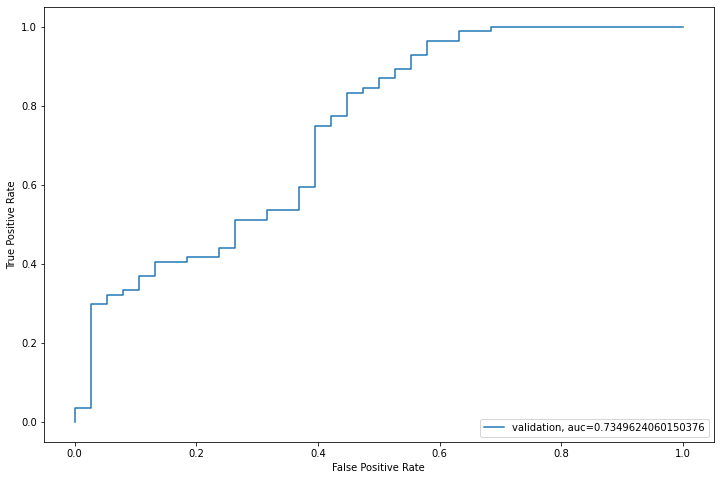

In [47]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [53]:
sample['Loan_Status']=pred_test 
sample['Loan_ID']=sample['Loan_ID']

sample['Loan_Status'].replace(0, 'N',inplace=True) 
sample['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(sample, columns=['Loan_ID','Loan_Status']).to_csv('Loan_Prediction_KFold.csv', index=False)

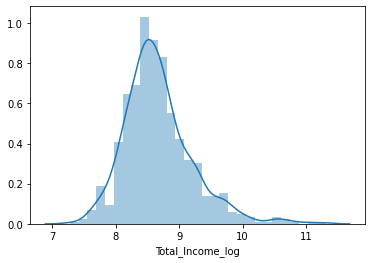

In [54]:
#Feature Engineering
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [55]:
'''
    Logistic Regression
    Decision Tree
    Random Forest
    XGBoost
    '''

'\n    Logistic Regression\n    Decision Tree\n    Random Forest\n    XGBoost\n    '

In [56]:
#Preparing Dataset
X = train.drop('Loan_Status',1) 
y = train.Loan_Status                # Save target variable in separate dataset

In [57]:
#Logistic Regression
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]

sample['Loan_Status']=pred_test            # filling Loan_Status with predictions 
sample['Loan_ID']=sample['Loan_ID'] # filling Loan_ID with test Loan_ID

# replacing 0 and 1 with N and Y 
sample['Loan_Status'].replace(0, 'N',inplace=True) 
sample['Loan_Status'].replace(1, 'Y',inplace=True)

# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv', index=False)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5


/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


In [58]:
#Decision Tree
from sklearn import tree
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)

sample['Loan_Status']=pred_test            # filling Loan_Status with predictions 
sample['Loan_ID']=sample['Loan_ID'] # filling Loan_ID with test Loan_ID

# replacing 0 and 1 with N and Y 
sample['Loan_Status'].replace(0, 'N',inplace=True) 
sample['Loan_Status'].replace(1, 'Y',inplace=True)

# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv', index=False)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


In [61]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test = model.predict(test)

from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 
             'n_estimators': list(range(1, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

# Fit the grid search model 
grid_search.fit(x_train,y_train)



1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [62]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [64]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=41)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]

sample['Loan_Status']=pred_test            # filling Loan_Status with predictions 
sample['Loan_ID']=sample['Loan_ID'] # filling Loan_ID with test Loan_ID

# replacing 0 and 1 with N and Y 
sample['Loan_Status'].replace(0, 'N',inplace=True) 
sample['Loan_Status'].replace(1, 'Y',inplace=True)

# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv', index=False)


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7868852459016393


<AxesSubplot:>

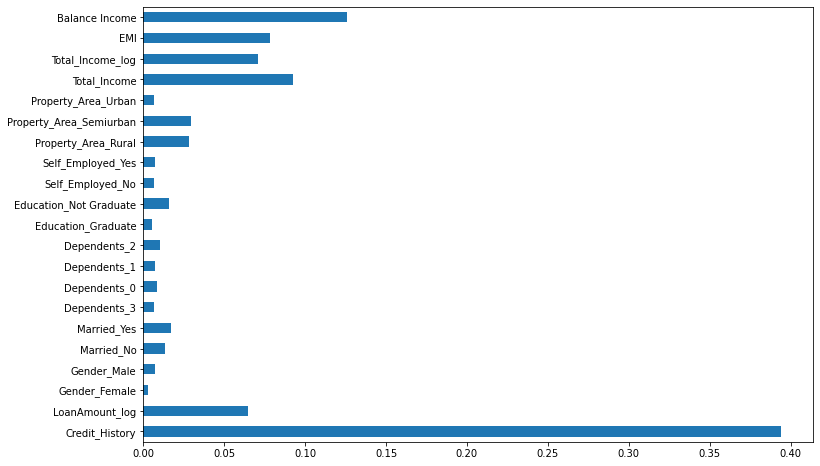

In [65]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [67]:
#XGBoost
from xgboost import XGBClassifier

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred3=model.predict_proba(test)[:,1]

sample['Loan_Status']=pred_test 
sample['Loan_ID']=sample['Loan_ID']

sample['Loan_Status'].replace(0, 'N',inplace=True) 
sample['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv', index=False)


1 of kfold 5
accuracy_score 0.7804878048780488

2 of kfold 5
accuracy_score 0.7886178861788617

3 of kfold 5
accuracy_score 0.7642276422764228

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7622950819672131
